# Salary prediction notebook

### Introduction, objectives etc

In [1]:
import pandas as pd
from scipy.stats import zscore

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# EDA

## Univariate analysis

 Each category

- missing values?
- outliers?
- how many categories for "education"
- how mnay categories for "job title"
- distribution of years of experience? 

In [3]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
df.describe()


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
df['Age'].describe()

count    6702.000000
mean       33.620859
std         7.614633
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64

In [6]:
features_considered = ['Age', 'Years of Experience', 'Salary']
z_scores = zscore(df[features_considered], nan_policy = 'omit')
z_scores.head()

,Age,Years of Experience,Salary
0,-0.212877,-0.510797,-0.479839
1,-0.738221,-0.840909,-0.953483
2,1.494490,1.139763,0.656907
3,0.312467,-0.180685,-1.048212
4,2.413841,1.965043,1.604195


# Bivariate analysis

- Correlation between years of experience and salary
- scatterplots
- boxplots (all variables against salary and see if median is similar) 
    to understand what factors really affect salary
- categorical variables and their relationships
- how variables relate to salary

In [7]:
df["Job Title"].value_counts

<bound method IndexOpsMixin.value_counts of 0           Software Engineer
1                Data Analyst
2              Senior Manager
3             Sales Associate
4                    Director
                ...          
6699    Director of Marketing
6700          Sales Associate
6701        Financial Manager
6702        Marketing Manager
6703          Sales Executive
Name: Job Title, Length: 6704, dtype: object>

In [8]:
unique_values = df['Job Title'].unique()

print(unique_values)

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [9]:
to_read = open("Non_CS_Jobs.txt")
Non_CS_Jobs = []
while(True):
    content = to_read.readline()
    if not content:
        break
    content = content.strip()
    Non_CS_Jobs.append(content[1: (len(content) - 1)])

    print(content[1: (len(content) - 1)])


Sales Associate
Director
Marketing Analyst
Product Manager
Sales Manager
Marketing Coordinator
Senior Scientist
HR Manager
Financial Analyst
Project Manager
Customer Service Rep
Operations Manager
Marketing Manager
Senior Engineer
Sales Director
Business Analyst
VP of Operation
Recruiter
Financial Manager
Social Media Specialist
Senior Consultant
Product Designer
CEO
Accountant
Marketing Specialist
Technical Writer
HR Generalist
Project Engineer
Customer Success Rep
Sales Executive
Operations Director
Administrative Assistant
Strategy Consultant
Copywriter
Account Manager
Director of Marketing
Customer Service Manager
Business Intelligence Analyst
Event Coordinator
VP of Finance
Graphic Designer
Social Media Manager
Director of Operations
Junior Accountant
Digital Marketing Manager
Customer Service Representative
Business Development Manager
Senior Financial Analyst
Research Director
Creative Director
Human Resources Director
Content Marketing Manager
Technical Recruiter
Sales Represe

Filtering out non CS jobs 

In [10]:
print(len(df.index))
mask = ~df['Job Title'].isin(Non_CS_Jobs)

# Filter the DataFrame using the mask
filtered_df = df[mask]

print(len(filtered_df.index))
filtered_df.head


6704
3645


<bound method NDFrame.head of        Age  Gender    Education Level           Job Title  \
0     32.0    Male         Bachelor's   Software Engineer   
1     28.0  Female           Master's        Data Analyst   
2     45.0    Male                PhD      Senior Manager   
10    29.0    Male           Master's  Software Developer   
18    25.0  Female         Bachelor's    Data Entry Clerk   
...    ...     ...                ...                 ...   
6230  32.0  Female                PhD      Data Scientist   
6233  27.0    Male  Bachelor's Degree   Software Engineer   
6244  32.0  Female                PhD      Data Scientist   
6247  27.0    Male  Bachelor's Degree   Software Engineer   
6258  32.0  Female                PhD      Data Scientist   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
10                    3.0   75000.0  
18                    0.0   35000.0  
...      

Filtering out null values

In [11]:
print(len(filtered_df.index))
filtered_df = filtered_df.dropna(subset = ['Gender']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Education Level']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Job Title']).reset_index(drop = True)
filtered_df = filtered_df.dropna(subset = ['Salary']).reset_index(drop = True)

filtered_df.isna().sum()[filtered_df.isna().sum()>0]

print(len(filtered_df.index))
filtered_df.isna().sum()

#there are 0 negative salaries in the dataset, or all salaries are valid
condition = filtered_df['Salary'] < 0
count = condition.sum()
print(count)


3645
3641
0


Checking Years of Experience

In [12]:
years_condition = filtered_df['Years of Experience'] < 0
years_count = years_condition.sum()
print(years_count)


0


Checking Age

In [13]:
age_condition = filtered_df['Age'] < 0
age_count = age_condition.sum()
print(age_count)

0


In [14]:
filtered_df["Education Level"].value_counts

<bound method IndexOpsMixin.value_counts of 0              Bachelor's
1                Master's
2                     PhD
3                Master's
4              Bachelor's
              ...        
3636                  PhD
3637    Bachelor's Degree
3638                  PhD
3639    Bachelor's Degree
3640                  PhD
Name: Education Level, Length: 3641, dtype: object>

Making Education Levels uniform 

In [15]:
edu_unique_values = filtered_df['Education Level'].unique()

print(edu_unique_values)

filtered_df['Education Level'].replace('Bachelor\'s Degree', 'Bachelor\'s', inplace=True)
filtered_df['Education Level'].replace('Master\'s Degree', 'Master\'s', inplace=True)
filtered_df['Education Level'].replace('phD', 'PhD', inplace=True)
edu_unique_values = filtered_df['Education Level'].unique()

print(edu_unique_values)

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School']
["Bachelor's" "Master's" 'PhD' 'High School']


In [27]:
filtered_df["Gender"].value_counts


filtered_df = filtered_df.drop(filtered_df[filtered_df['Gender'] == 'Other'].index)
gen_unique_values = filtered_df['Gender'].unique()
print(gen_unique_values)

['Male' 'Female']


# Data preprocessing

- Treat out null values
- Treat outliers
- one-hot encode our categorical columns (gender, education, job title)
- 

Dropping Duplicates
Do we need to drop duplicates? There seems to be many (could be different people with identical data?)

In [17]:
filtered_df
filtered_df.sort_values(['Age','Salary'])

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1802,22.0,Male,Bachelor's,Front End Developer,1.0,50000.0
2205,22.0,Male,Bachelor's,Software Engineer,1.0,50000.0
1971,22.0,Female,High School,Back end Developer,0.0,51832.0
2051,22.0,Female,High School,Back end Developer,0.0,51832.0
2189,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
...,...,...,...,...,...,...
775,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
786,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
808,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
854,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0


In [18]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now print the entire DataFrame
#print(filtered_df)

Is 55 duplicates enough to warrant filtering out duplicates?

In [19]:

print(len(filtered_df.index))
indices = []
mydict = {}
for index, row in filtered_df.iterrows():
    a = [row['Age'], row['Gender'], row['Education Level'], row['Years of Experience'], row['Salary']]
    a = tuple(a)
    if a in mydict:
        mydict[a] += 1
        print(a)
        print(index)
        indices.append(index)
        print("HELLO")
    else:
        mydict[a] = 1
print(len(indices))
for i in indices:
    filtered_df.drop(i, inplace = True)

sum = 0
for i in mydict.values():
    if i > 1:
        sum += i - 1

#print(len(indices))
print(len(filtered_df.index))


3641
(29.0, 'Male', "Master's", 3.0, 75000.0)
9
HELLO
(36.0, 'Male', "Bachelor's", 7.0, 60000.0)
30
HELLO
(33.0, 'Male', "Bachelor's", 5.0, 50000.0)
31
HELLO
(28.0, 'Male', "Bachelor's", 2.0, 40000.0)
34
HELLO
(38.0, 'Male', "Master's", 9.0, 110000.0)
48
HELLO
(44.0, 'Male', "Bachelor's", 14.0, 130000.0)
49
HELLO
(46.0, 'Male', 'PhD', 18.0, 160000.0)
50
HELLO
(45.0, 'Male', 'PhD', 16.0, 150000.0)
55
HELLO
(44.0, 'Male', "Bachelor's", 13.0, 130000.0)
56
HELLO
(44.0, 'Female', 'PhD', 16.0, 160000.0)
60
HELLO
(45.0, 'Female', 'PhD', 16.0, 160000.0)
61
HELLO
(44.0, 'Female', 'PhD', 16.0, 160000.0)
62
HELLO
(29.0, 'Female', "Bachelor's", 4.0, 140000.0)
73
HELLO
(25.0, 'Female', "Master's", 1.0, 100000.0)
74
HELLO
(33.0, 'Male', 'PhD', 8.0, 190000.0)
75
HELLO
(31.0, 'Female', "Bachelor's", 6.0, 155000.0)
76
HELLO
(30.0, 'Female', "Bachelor's", 5.0, 145000.0)
77
HELLO
(25.0, 'Female', "Master's", 1.0, 100000.0)
82
HELLO
(33.0, 'Male', 'PhD', 8.0, 190000.0)
83
HELLO
(31.0, 'Female', "Bachelor'

In [20]:
one_hot_encoded_data = pd.get_dummies(filtered_df,  dtype=int, columns = ['Education Level', 'Gender', 'Job Title'])
print(one_hot_encoded_data.head())

    Age  Years of Experience    Salary  Education Level_Bachelor's  \
0  32.0                  5.0   90000.0                           1   
1  28.0                  3.0   65000.0                           0   
2  45.0                 15.0  150000.0                           0   
3  29.0                  3.0   75000.0                           0   
4  25.0                  0.0   35000.0                           1   

   Education Level_High School  Education Level_Master's  Education Level_PhD  \
0                            0                         0                    0   
1                            0                         1                    0   
2                            0                         0                    1   
3                            0                         1                    0   
4                            0                         0                    0   

   Gender_Female  Gender_Male  Gender_Other  Job Title_Back end Developer  \
0              

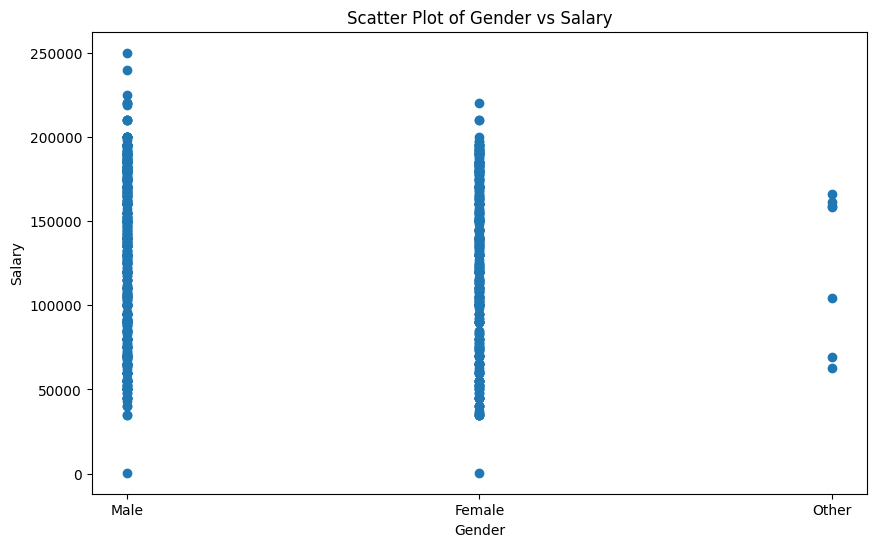

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Gender'], filtered_df['Salary'])
plt.title('Scatter Plot of Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

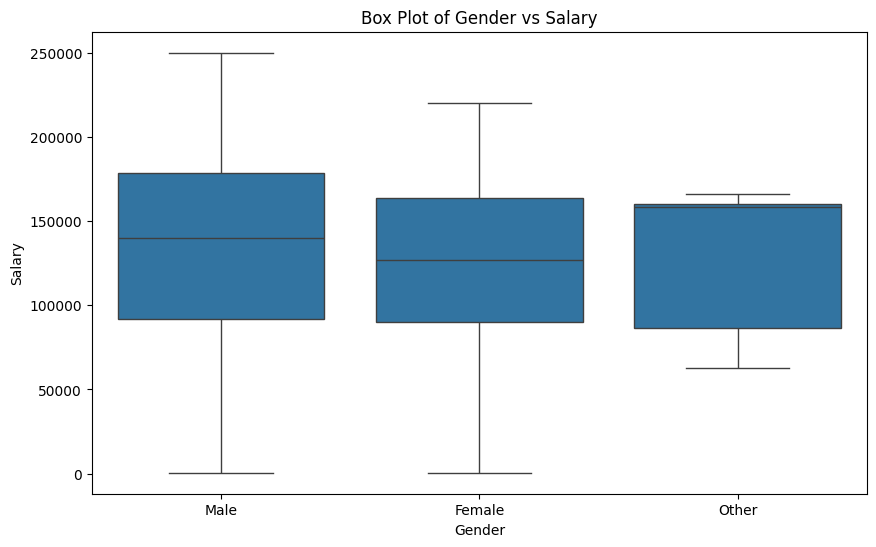

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=filtered_df)
plt.title('Box Plot of Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

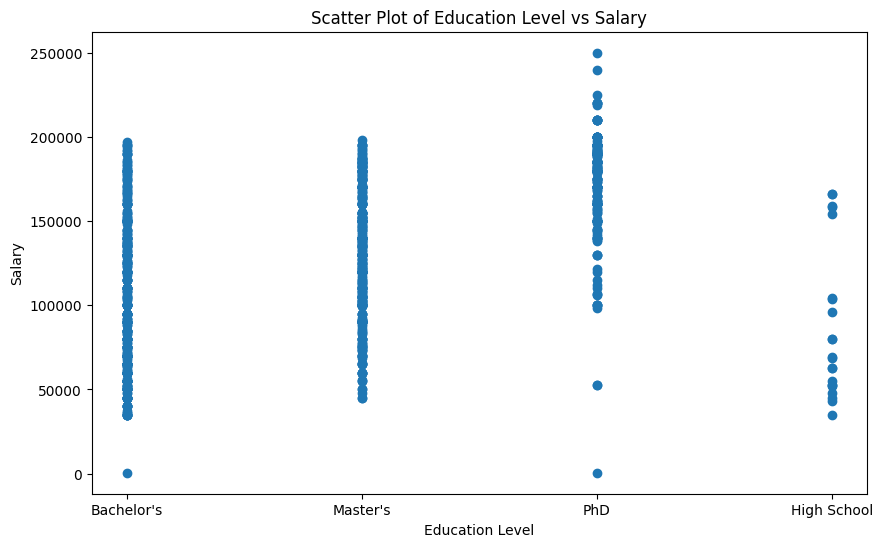

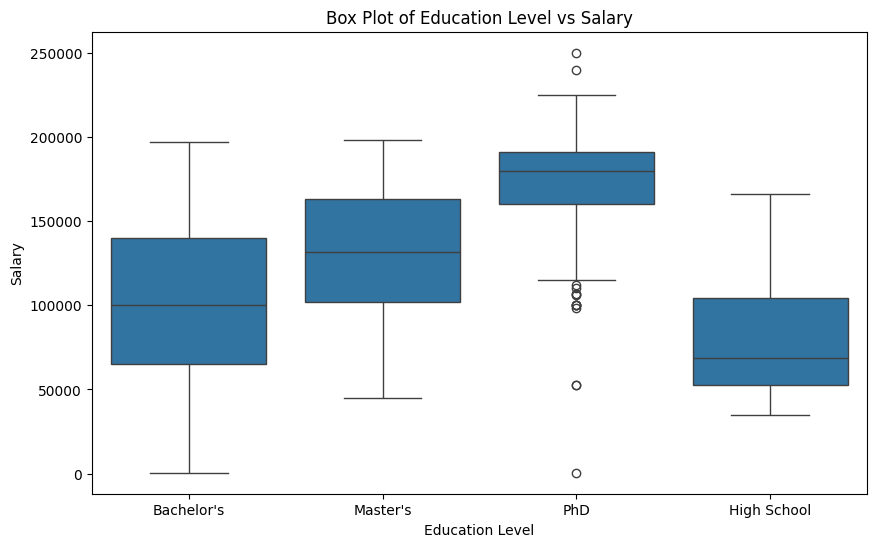

In [23]:
# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Education Level'], filtered_df['Salary'])
plt.title('Scatter Plot of Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=filtered_df)
plt.title('Box Plot of Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

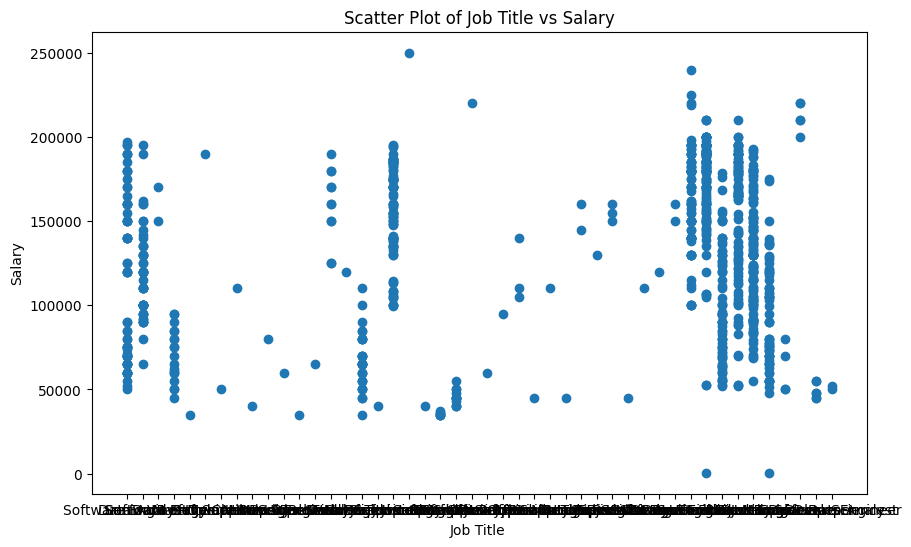

ValueError: Could not interpret value `Job Title ` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [24]:
# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Job Title'], filtered_df['Salary'])
plt.title('Scatter Plot of Job Title vs Salary')
plt.xlabel('Job Title ')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Job Title ', y='Salary', data=filtered_df)
plt.title('Box Plot of Job Title  vs Salary')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.show()

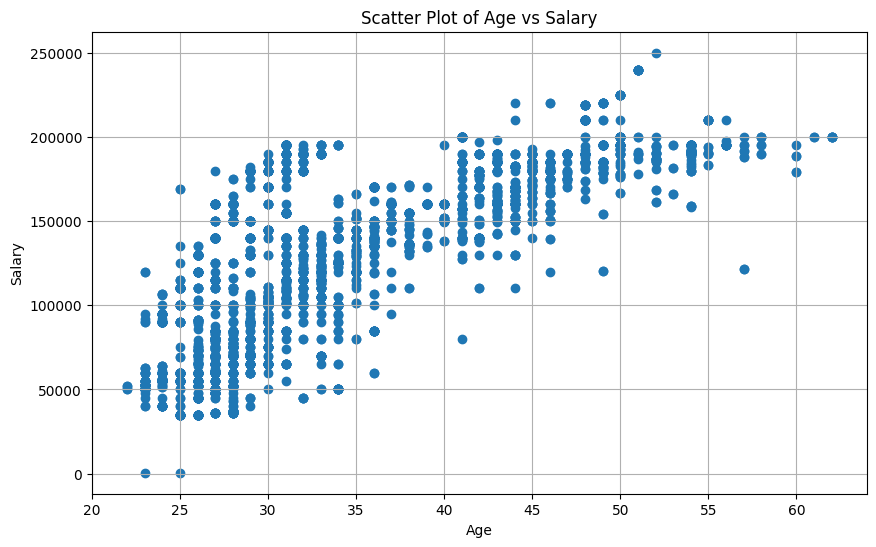

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age'], filtered_df['Salary'])
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

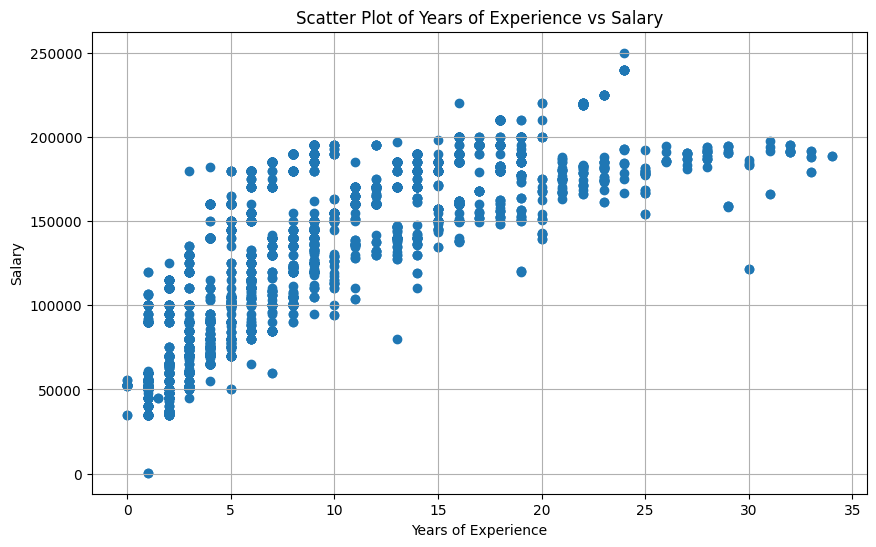

In [ ]:
# Using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Years of Experience'], filtered_df['Salary'])
plt.title('Scatter Plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

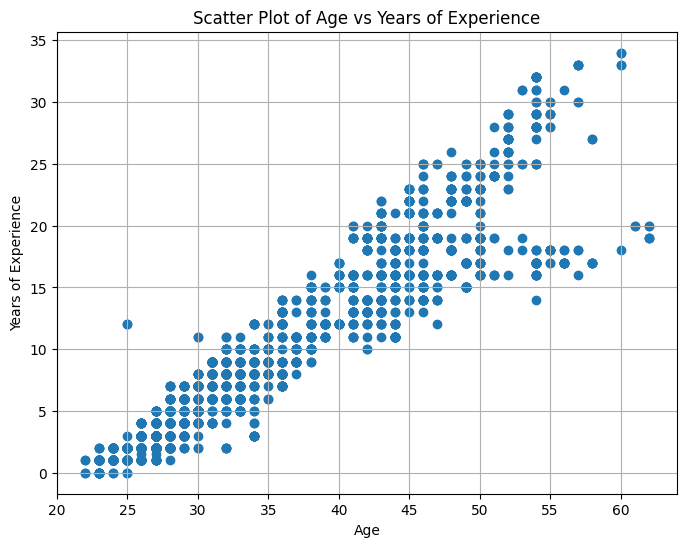

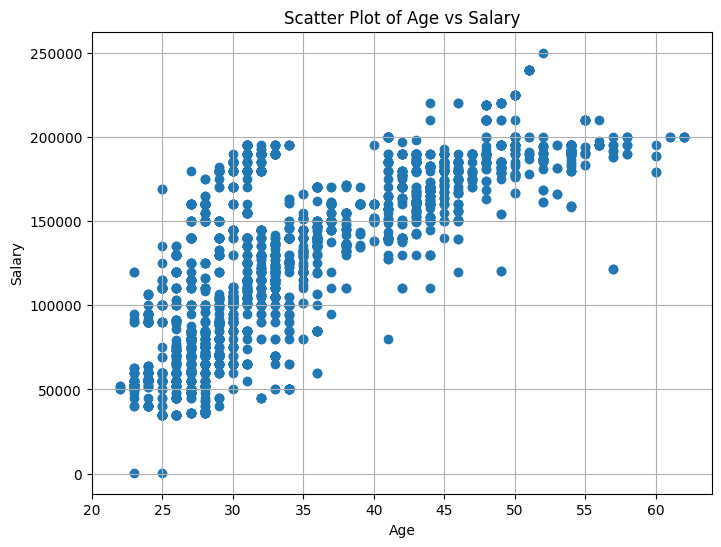

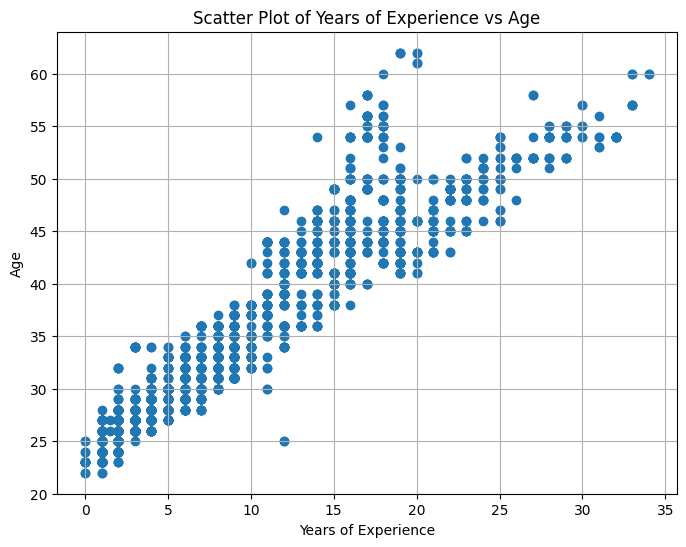

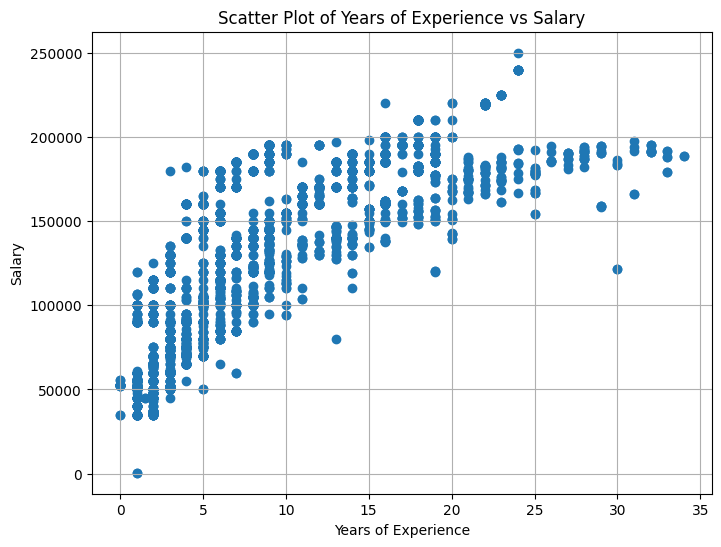

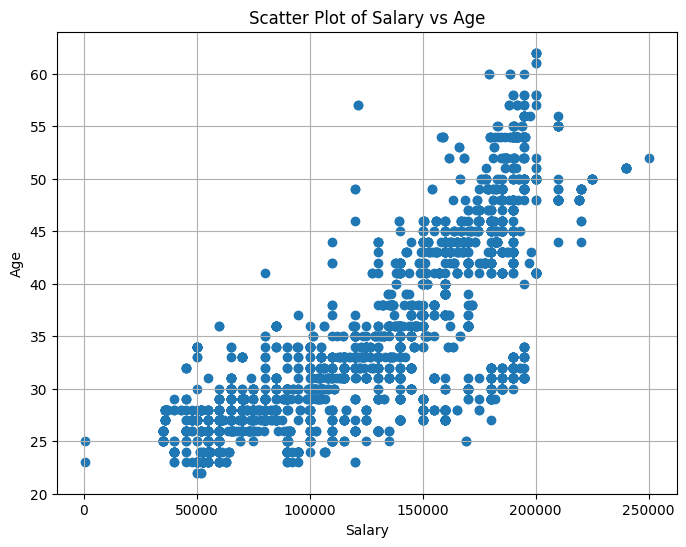

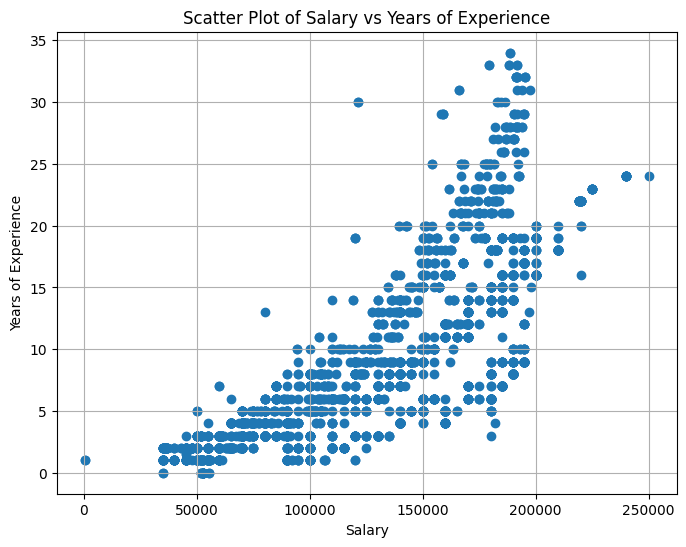

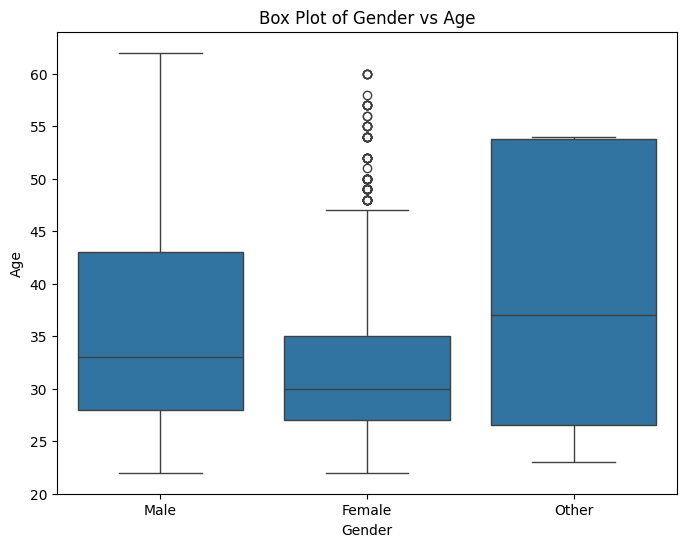

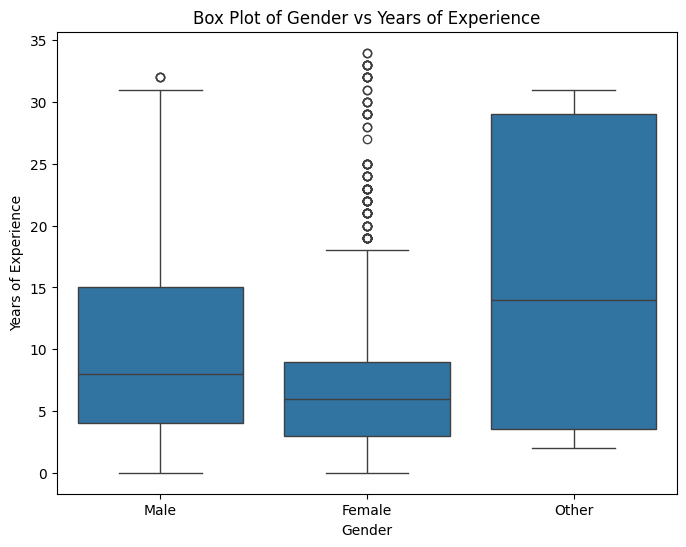

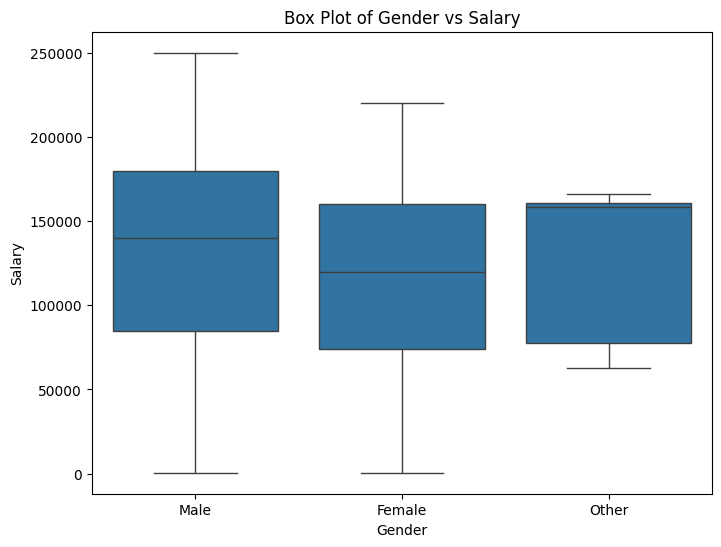

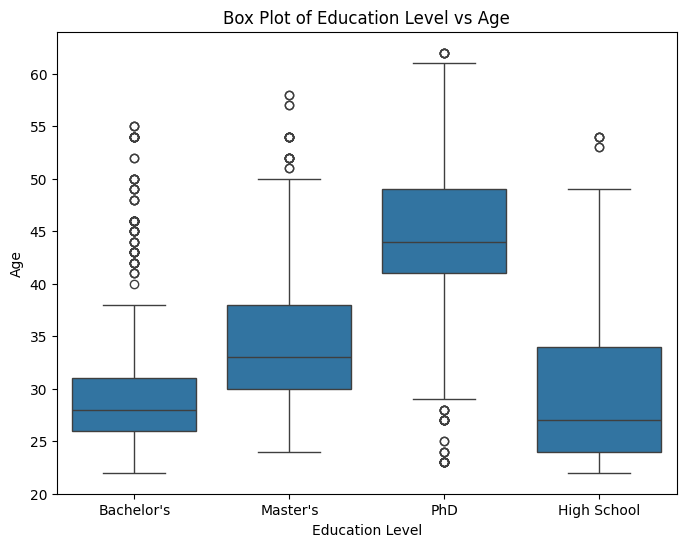

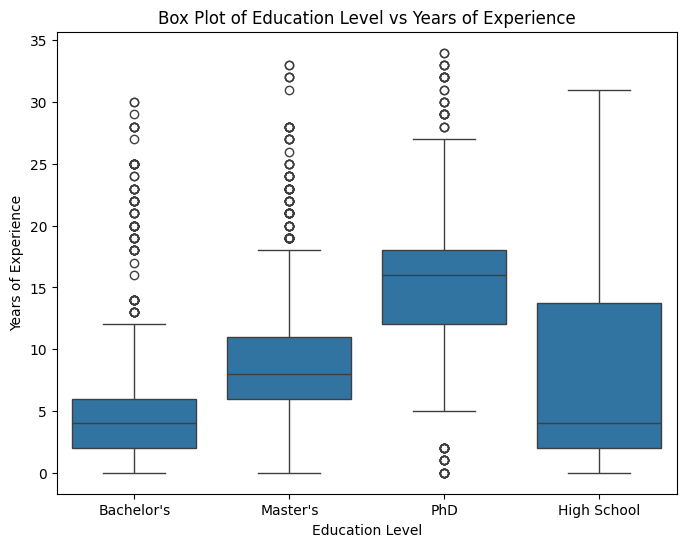

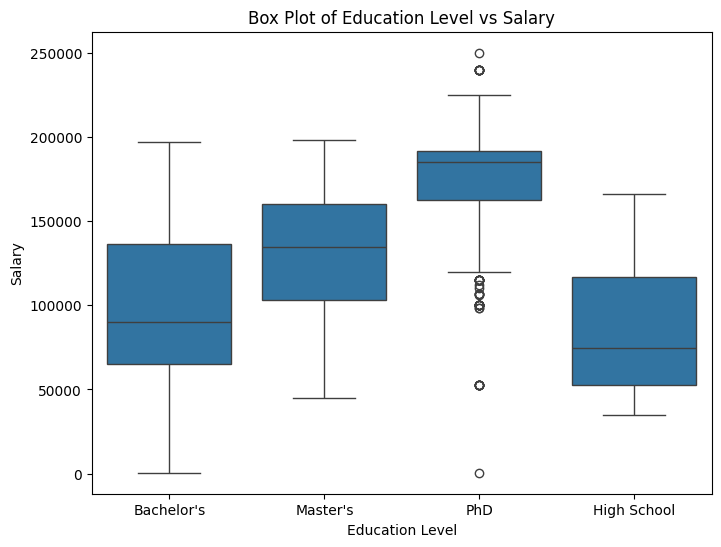

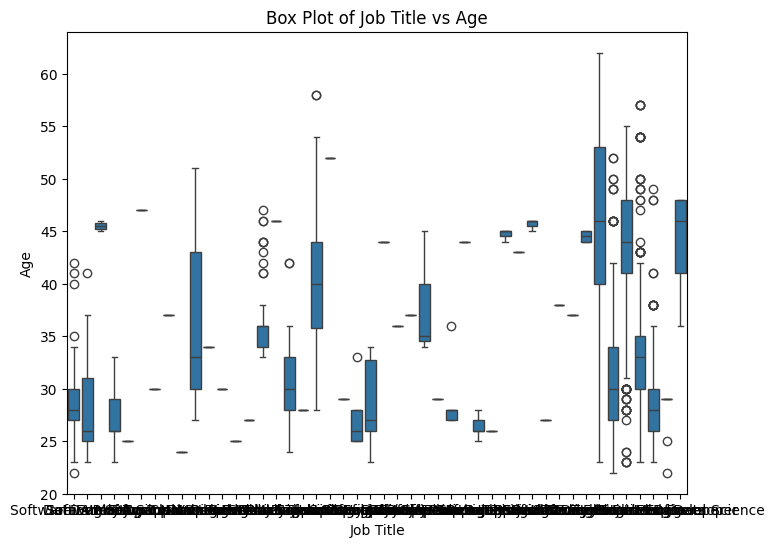

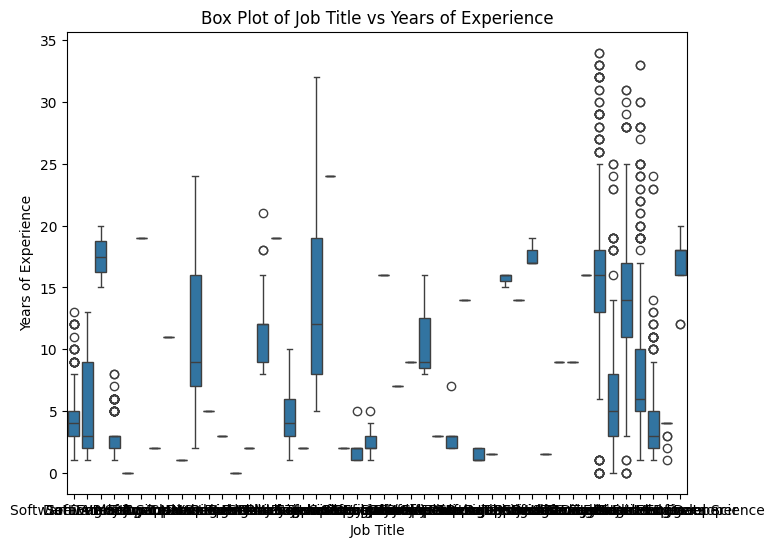

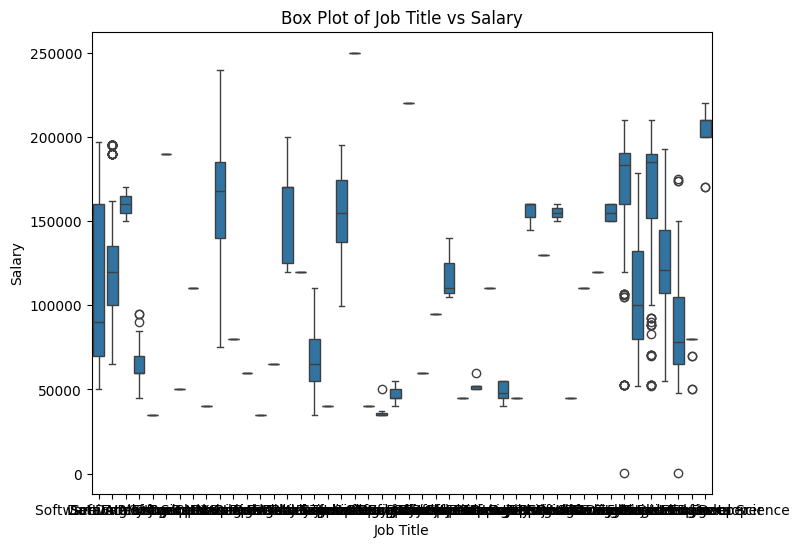

In [ ]:
def plot_all_variables(df):
    numeric_vars = df.select_dtypes(include=['int', 'float']).columns
    categorical_vars = df.select_dtypes(include=['object']).columns

    # Scatter plots for numeric variables
    for i, numeric_var1 in enumerate(numeric_vars):
        for j, numeric_var2 in enumerate(numeric_vars):
            if i != j:
                plt.figure(figsize=(8, 6))
                plt.scatter(df[numeric_var1], df[numeric_var2])
                plt.title(f'Scatter Plot of {numeric_var1} vs {numeric_var2}')
                plt.xlabel(numeric_var1)
                plt.ylabel(numeric_var2)
                plt.grid(True)
                plt.show()

    # Box plots for categorical variables
    for categorical_var in categorical_vars:
        for numeric_var in numeric_vars:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=categorical_var, y=numeric_var, data=df)
            plt.title(f'Box Plot of {categorical_var} vs {numeric_var}')
            plt.xlabel(categorical_var)
            plt.ylabel(numeric_var)
            plt.show()

# Example usage:
plot_all_variables(filtered_df)

<Figure size 1000x600 with 0 Axes>

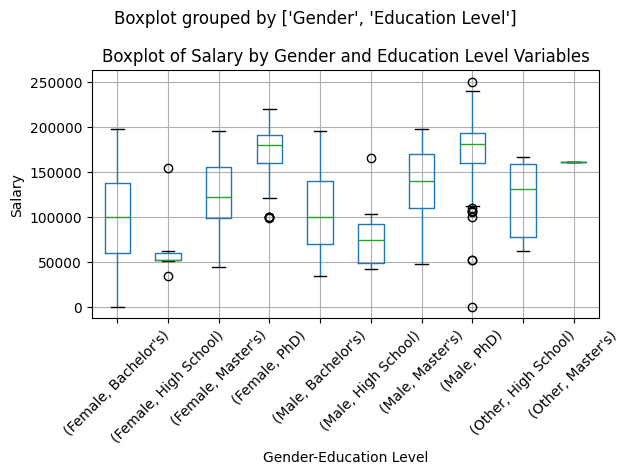

In [25]:
# Create a boxplot
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='Salary', by=['Gender', 'Education Level'])

# Set labels and title
plt.xlabel('Gender-Education Level')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by Gender and Education Level Variables')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()